In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [2]:
def compute_drawdowns(log_returns):
    # Calculate cumulative returns
    cumulative_returns = np.exp(log_returns.cumsum())
    # Calculate ongoing drawdown
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    return drawdowns

In [11]:
def plot_returns(log_returns):
    # Create figure and axis objects
    fig, ax = plt.subplots()
    # Calculate cumulative returns
    cumulative_returns = np.exp(log_returns.cumsum())

    # Calculate ongoing drawdown
    drawdowns = compute_drawdowns(log_returns)

    # If cumulative_returns is a DataFrame, select the right column
    if isinstance(drawdowns, pd.DataFrame):
        drawdowns = drawdowns.iloc[:, 0]  # or use drawdowns['Adj Close']

    

    
    # Plotting the results
    ax.plot(cumulative_returns - 1, label='Cumulative Returns')
    ax.fill_between(drawdowns.index, drawdowns, label='Drawdowns', color='red', alpha=0.3)
    # Setting x-axis major locator to each year and formatter
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Setting y-axis ticks every 20%
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # Adding grid with vertical lines for each year
    ax.grid(True, which='major', linestyle='--', color='grey')
    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45)
    # Ensure date labels are visible
    # fig.autofmt_xdate()
    ax.legend()
    ax.set_title('S&P500 Cumulative Returns and Drawdowns')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns/Drawdown')
    fig.tight_layout()
    plt.show()

In [5]:
# Download S&P 500 front month futures data
sp500_futures_prices = yf.download('ES=F', auto_adjust=False)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [9]:
# Calculate logarithmic returns
log_returns = np.log(sp500_futures_prices).diff()

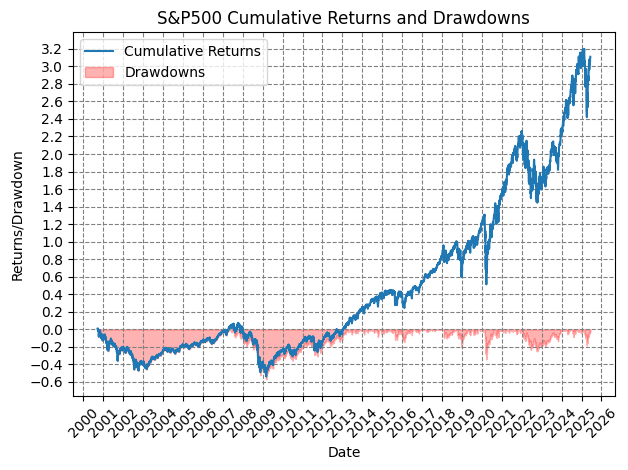

In [12]:
plot_returns(log_returns)